In [46]:
from turbo_ml.turbo_ml_experimental import TurboML_Experimental
from turbo_ml.meta_learning import MetaModelGuesser
from datasets import get_iris
import pandas as pd
from captum.attr import IntegratedGradients

pure_data, target = get_iris()
data = pure_data.copy()
data['target'] = target
MODEL_PATH = 'new_model'
tbml = TurboML_Experimental(data, 'target', hpo_enabled=False, guesser=MetaModelGuesser(path=MODEL_PATH))


In [2]:
model = tbml.guesser._meta_model.to('cpu')
model.eval()
input_data = tbml.guesser.last_input.to('cpu')
predictions = model(input_data)[0]
target = max(range(len(predictions)), key=predictions.__getitem__)

In [3]:
names = pd.read_csv('algorithm_results.csv')
names.drop('name', axis=1, inplace=True)
classifier_name = names.columns[target]
print(f'Chosen classifier name: {classifier_name}')

Chosen classifier name: RadiusNeighborsClassifier


[['num_classes', np.float64(0.0010523099761298408)], ['log_features', np.float64(0.005615990569109868)], ['dataset_dimensionality_log', np.float64(0.006859534355209472)], ['inverse_dataset_dimensionality', np.float64(0.06909154049498037)], ['inverse_dataset_dimensionality_log', np.float64(0.053731814266520614)], ['class_prob_min', np.float64(0.12171146512965302)], ['class_prob_max', np.float64(0.02733230449662714)], ['class_prob_mean', np.float64(0.09357264152091938)], ['class_entropy', np.float64(0.02540994313107949)], ['kurtosis_min', np.float64(0.0027897964454940407)], ['skewness_min', np.float64(0.042035146144211416)], ['skewness_max', np.float64(0.0031332305900948028)], ['skewness_mean', np.float64(0.043498990894921985)], ['skewness_std', np.float64(0.004917783073913906)], ['pca_95_index', np.float64(0.0015598091374071576)], ['pca_skewness', np.float64(0.006630211676667548)], ['pca_kurtosis', np.float64(0.0019233044212587974)], ['number_of_landmarks_at_0.25', np.float64(0.00212760

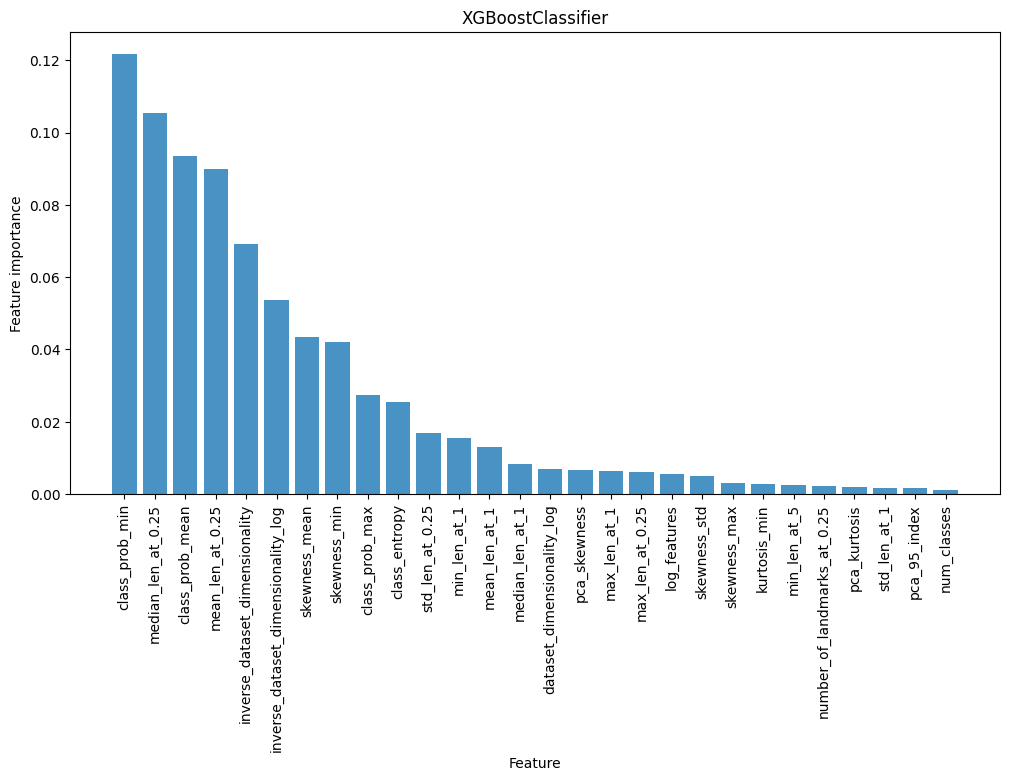

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_importances(feature_names, importances):
    plt.figure(figsize=(12,6))
    plt.bar(range(len(importances)), importances, align='center', color='#4992C4')

    r_name = zip(range(len(importances)), feature_names)
    ticks, names = zip(*filter(lambda x: abs(importances[x[0]]) > 0.001, r_name))

    plt.xticks(ticks, names, rotation='vertical')

target = 35
ig = IntegratedGradients(model)
attributions = ig.attribute(input_data, target=target).detach().numpy()[0]
name_value_zip = [[a, abs(b)] for a, b in zip(list(tbml.dataset_params.keys()), attributions) if abs(b) > 0.001]
print(name_value_zip)
# visualize_importances(list(tbml.dataset_params.keys()), attributions)
name_value_zip_sorted = list(sorted(name_value_zip, key=lambda x: x[1], reverse=True))
visualize_importances(*zip(*name_value_zip_sorted))
plt.xlabel('Feature')
plt.ylabel('Feature importance')
_ = plt.title(names.columns[target])